In [1]:
import numpy as np
from scipy.optimize import fmin_cg, minimize
from displayData import displayData
from nnCostFunction import nnCostFunction
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from checkNNGradients import checkNNGradients
from predict import predict
from sklearn.metrics import accuracy_score
from sigmoid import sigmoid


 Machine Learning Course - Assignment 7: Neural Networks

  Instructions
  ------------
 
  This file contains code that helps you get started on the
  linear exercise. You will need to complete the following functions 
  in this exericse:

     sigmoidGradient.py
     nnCostFunction.py
     predict.py

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.


 Initialization


In [2]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)


## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data

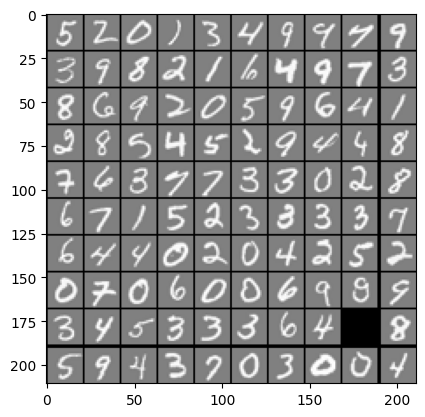

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.]])

In [3]:
data = np.array([[float(x) for x in l.split(',')] for l in open('../data/dataset.csv', 'r').readlines()])
X = data[:, 0:-1]
y = data[:,-1]

m = X.shape[0]

# Randomly select 100 data points to display
sel = np.random.choice(m, 100, replace=False)

displayData(X[sel, :])

## ================ Part 2: Loading Pameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

In [4]:
print ('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
Theta1 = np.array([[float(x) for x in l.split(',')] for l in open('../data/sampleTheta1.csv', 'r').readlines()])
Theta2 = np.array([[float(x) for x in l.split(',')] for l in open('../data/sampleTheta2.csv', 'r').readlines()])

# Unroll parameters 
nn_params = np.concatenate((Theta1.ravel(), Theta2.ravel()), axis=0)


Loading Saved Neural Network Parameters ...



## ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.py to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.
#

In [5]:
# Weight regularization parameter (we set this to 0 here).
lambda_par = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print ('Cost at parameters (loaded from sampleTheta1 and sampleTheta2):', J, '\n(this value should be about 0.287629)\n')


#input("Program paused. Press enter to continue.\n")

Cost at parameters (loaded from sampleTheta1 and sampleTheta2): 0.2876291653573195 
(this value should be about 0.287629)



## =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#


In [6]:
print ('\nChecking Cost Function with Regularization ... \n')

# Weight regularization parameter (we set this to 1 here).
lambda_par = 1.

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print ('Cost at parameters (loaded from sampleTheta1 and sampleTheta2):', J, '\n(this value should be about 0.383770)\n')

#input("Program paused. Press enter to continue.\n")


Checking Cost Function with Regularization ... 

Cost at parameters (loaded from sampleTheta1 and sampleTheta2): 0.38376985928929785 
(this value should be about 0.383770)



## ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.py file.
#

In [7]:
print ('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
print ('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print (g)
print ('\n\n')

#input("Program paused. Press enter to continue.\n")



Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]





## ================ Part 6: Initializing Pameters ================
#  In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.py)

In [8]:
print ('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

# Unroll parameters
initial_nn_params = np.concatenate((initial_Theta1.ravel(), initial_Theta2.ravel()), axis=0)




Initializing Neural Network Parameters ...



## =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.py to return the partial
#  derivatives of the parameters.
#

In [9]:
print ('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()

#input("Program paused. Press enter to continue.\n")



Checking Backpropagation... 

[[ 6.90654083e-03  6.90654084e-03]
 [-1.10852709e-04 -1.10852710e-04]
 [ 1.43851835e-04  1.43851834e-04]
 [ 2.66299667e-04  2.66299665e-04]
 [ 1.21251043e-02  1.21251043e-02]
 [-4.29822000e-05 -4.29822018e-05]
 [ 1.51666191e-04  1.51666187e-04]
 [ 2.06873381e-04  2.06873383e-04]
 [ 6.19847901e-03  6.19847902e-03]
 [ 6.41872688e-05  6.41872658e-05]
 [ 2.03012207e-05  2.03012235e-05]
 [-4.22496704e-05 -4.22496701e-05]
 [-5.42355683e-03 -5.42355683e-03]
 [ 1.12549716e-04  1.12549718e-04]
 [-1.30018474e-04 -1.30018475e-04]
 [-2.53048285e-04 -2.53048282e-04]
 [-1.20761029e-02 -1.20761029e-02]
 [ 5.72000558e-05  5.72000571e-05]
 [-1.60500357e-04 -1.60500356e-04]
 [-2.30637482e-04 -2.30637482e-04]
 [ 1.02286353e-01  1.02286353e-01]
 [ 5.09594910e-02  5.09594910e-02]
 [ 4.96506204e-02  4.96506204e-02]
 [ 5.32772700e-02  5.32772700e-02]
 [ 4.98448914e-02  4.98448914e-02]
 [ 5.07054723e-02  5.07054723e-02]
 [ 9.95931723e-02  9.95931723e-02]
 [ 5.02316727e-02  5.023

## =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.
#

In [10]:

print ('\nChecking Backpropagation with Regularization ... \n')

#  Check gradients by running checkNNGradients
lambda_par = 3.
checkNNGradients(lambda_par)

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print ('\n\nCost at (fixed) debugging parameters (with lambda = 3): ', debug_J, '\n(this value should be about 0.576051)\n\n')

#input("Program paused. Press enter to continue.\n")



Checking Backpropagation with Regularization ... 

[[ 0.00690654  0.00690654]
 [ 0.05037741  0.05037741]
 [ 0.0547017   0.0547017 ]
 [ 0.0087335   0.0087335 ]
 [ 0.0121251   0.0121251 ]
 [-0.05757844 -0.05757844]
 [-0.01661326 -0.01661326]
 [ 0.03962607  0.03962607]
 [ 0.00619848  0.00619848]
 [ 0.0247913   0.0247913 ]
 [-0.03262097 -0.03262097]
 [-0.06004166 -0.06004166]
 [-0.00542356 -0.00542356]
 [ 0.02532257  0.02532257]
 [ 0.05930642  0.05930642]
 [ 0.03876422  0.03876422]
 [-0.0120761  -0.0120761 ]
 [-0.05762665 -0.05762665]
 [-0.04521974 -0.04521974]
 [ 0.008762    0.008762  ]
 [ 0.10228635  0.10228635]
 [ 0.10144775  0.10144775]
 [ 0.10420847  0.10420847]
 [ 0.06174447  0.06174447]
 [ 0.00443674  0.00443674]
 [-0.00682998 -0.00682998]
 [ 0.09959317  0.09959317]
 [ 0.08965087  0.08965087]
 [ 0.10720022  0.10720022]
 [ 0.07664811  0.07664811]
 [ 0.01633527  0.01633527]
 [-0.01125638 -0.01125638]
 [ 0.29693242  0.29693242]
 [ 0.17354254  0.17354254]
 [ 0.20209208  0.20209208]
 [ 

## =================== Part 9: Training NN ===================
#  You have now implemented all the code necessary to train a neural
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#

In [11]:
print ('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
#options = optimset('MaxIter', 50)

#  You should also try different values of lambda
lambda_par = 1.

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)[0]
gradientFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)[1]

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
Nfeval = 1
def callbackF(Xi):
    global Nfeval
    print (Nfeval)
    Nfeval += 1


nn_params = fmin_cg(costFunction, initial_nn_params, fprime=gradientFunction, maxiter=50, disp=True, callback=callbackF)


# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[range(hidden_layer_size * (input_layer_size + 1))], (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], (num_labels, (hidden_layer_size + 1)))

#input("Program paused. Press enter to continue.\n")




Training Neural Network... 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
         Current function value: 0.440639
         Iterations: 50
         Function evaluations: 108
         Gradient evaluations: 108


## ================= Part 10: Visualize Weights =================
#  You can now "visualize" what the neural network is learning by
#  displaying the hidden units to see what features they are capturing in
#  the data.



Visualizing Neural Network... 



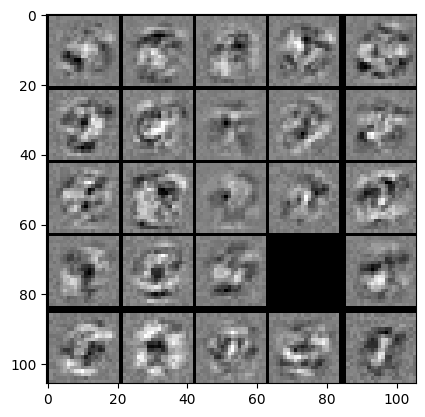

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        ,  0.06188825, -0.03360435, ...,  0.08142011,
         0.08057778, -0.08399707],
       [-1.        ,  0.06993018, -0.00647285, ..., -0.10614036,
        -0.02372984, -0.09696944],
       ...,
       [-1.        ,  0.07362981, -0.04805718, ..., -0.09103653,
         0.0191381 ,  0.01206677],
       [-1.        ,  0.02397521, -0.06888029, ...,  0.07961953,
         0.12662645,  0.07562441],
       [-1.        ,  0.07357487,  0.03037642, ..., -0.10999008,
         0.07831472, -0.01256284]])

In [12]:
print ('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])

#input("Program paused. Press enter to continue.\n")




## ================= Part 11: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.


In [13]:
pred = predict(Theta1, Theta2, X)

print ('\nTraining Set Accuracy:', accuracy_score(y, pred))


Training Set Accuracy: 0.9648
